In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
medical_data = pd.read_csv('/content/insurance.csv')

medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
medical_data.shape

(1338, 7)

In [4]:
medical_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 700x700 with 0 Axes>

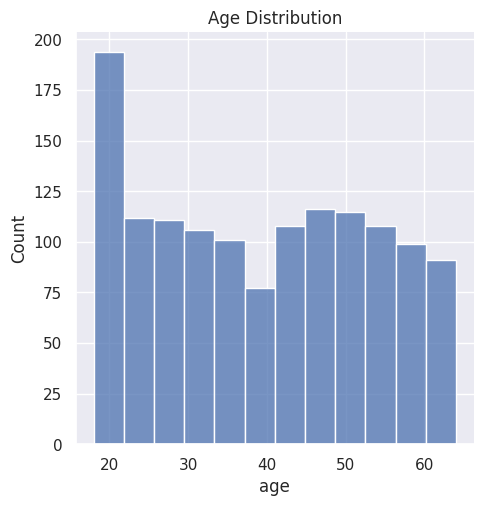

In [8]:
sns.set()
plt.figure(figsize = (7,7))
sns.displot(medical_data['age'])
plt.title('Age Distribution')
plt.show()

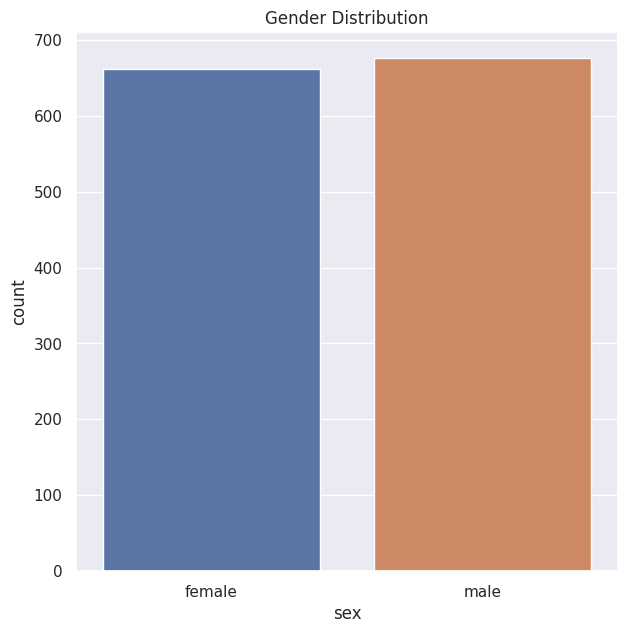

In [9]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'sex', data = medical_data)
plt.title('Gender Distribution')
plt.show()

In [10]:
medical_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

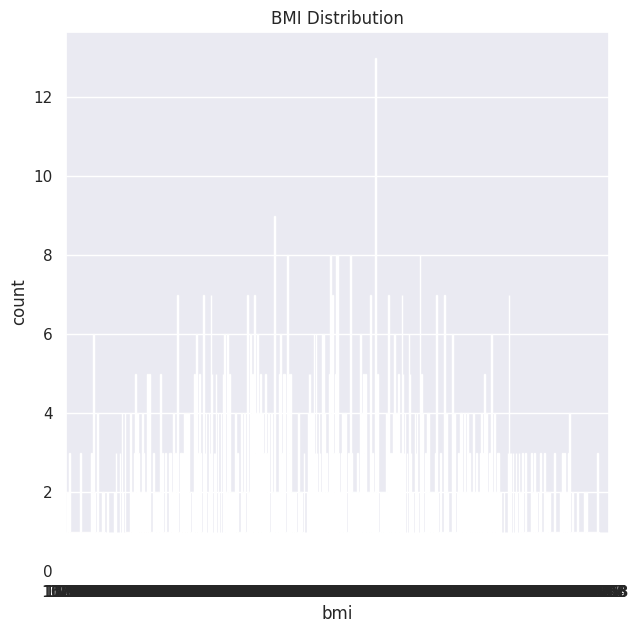

In [11]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'bmi', data = medical_data)
plt.title('BMI Distribution')
plt.show()

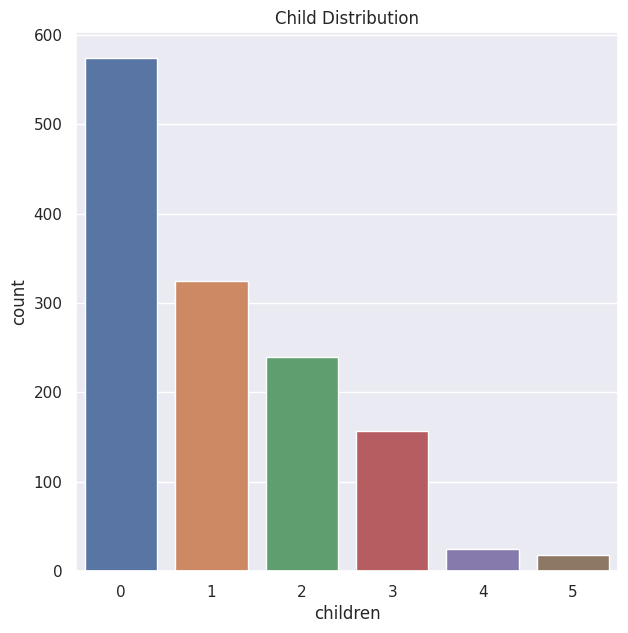

In [12]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'children', data = medical_data)
plt.title('Child Distribution')
plt.show()

In [13]:
medical_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

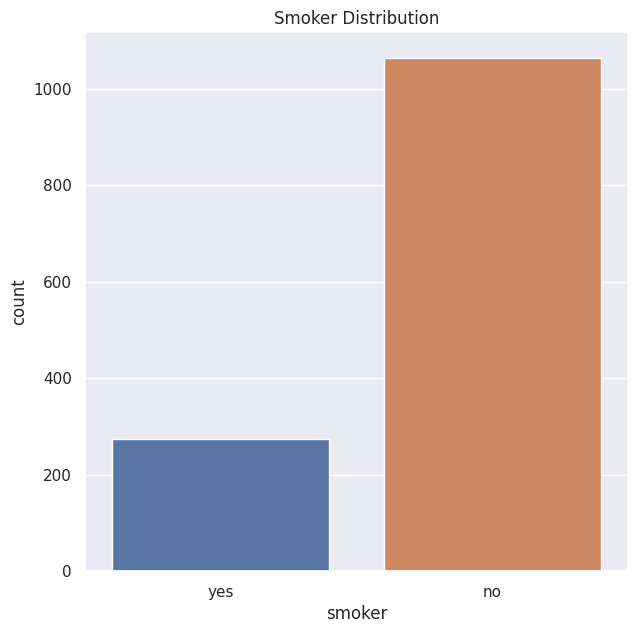

In [14]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'smoker', data = medical_data)
plt.title('Smoker Distribution')
plt.show()

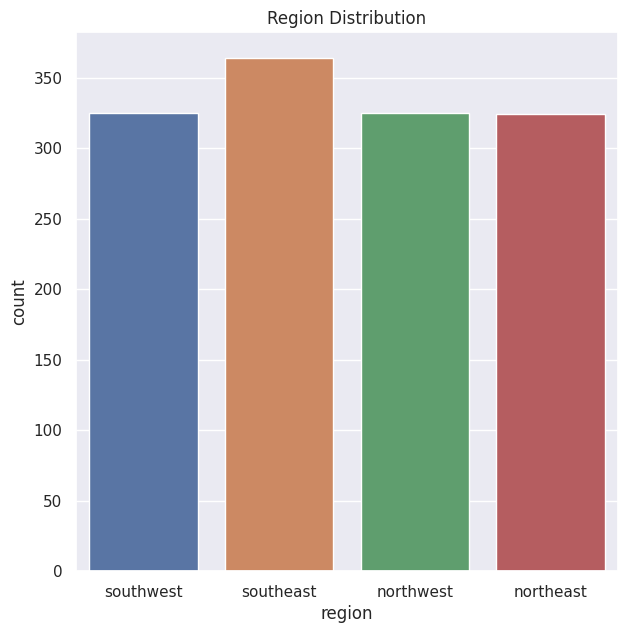

In [15]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'region', data = medical_data)
plt.title('Region Distribution')
plt.show()

In [16]:
medical_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

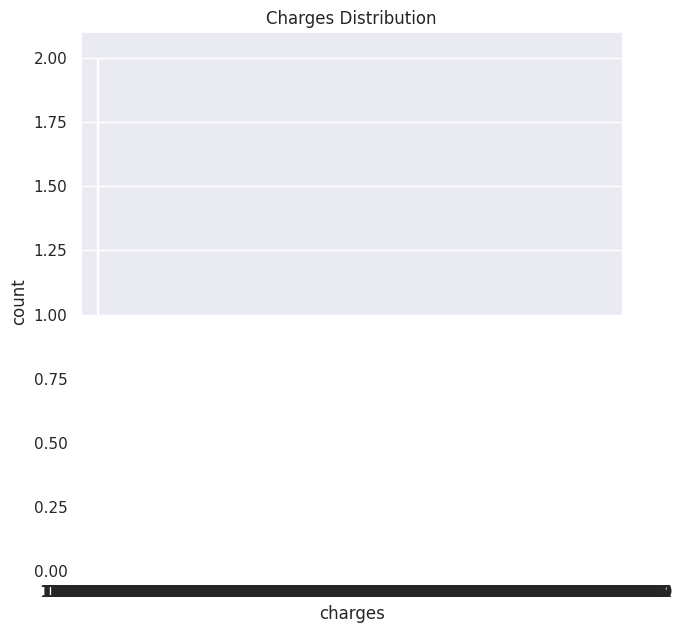

In [17]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'charges', data = medical_data)
plt.title('Charges Distribution')
plt.show()

In [18]:
medical_data.replace({'sex':{'male': 0, 'female': 1}}, inplace = True)
medical_data.replace({'smoker':{'yes': 0, 'no': 1}}, inplace = True)
medical_data.replace({'region':{'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 4}}, inplace = True)

medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [19]:
X = medical_data.drop(columns = 'charges', axis = 1)
Y = medical_data['charges']

print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       4
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1204, 6) (134, 6)


In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, Y_train)

LinearRegression()

In [34]:
training_data_prediction = model.predict(X_train)

r2_train = metrics.r2_score(Y_train, training_data_prediction)

print('R2 Value: ', r2_train)

R2 Value:  0.7538984564512119


In [36]:
test_data_prediction = model.predict(X_test)

r2_test = metrics.r2_score(Y_test, test_data_prediction)

print('R2 Value: ', r2_test)

R2 Value:  0.7052225214703878


In [44]:
input_data = (33,0,22.705,0,1,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print('The Insurance cost is USD: ', prediction[0])

The Insurance cost is USD:  3412.614652543645


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
